In [44]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn, sklearn.preprocessing, sklearn.cluster
import seaborn as sns 

In [3]:
df = pd.read_csv("cc_data.csv", sep=',')

# About Dataset
This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :-

**CUST_ID** : Identification of Credit Card holder (Categorical)  
**BALANCE** : Balance amount left in their account to make purchases  
**BALANCE_FREQUENCY** : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)  
**PURCHASES** : Amount of purchases made from account  
**ONEOFF_PURCHASES** : Maximum purchase amount done in one-go  
**INSTALLMENTS_PURCHASES** : Amount of purchase done in installment  
**CASH_ADVANCE** : Cash in advance given by the user  
**PURCHASES_FREQUENCY** : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)  
**ONEOFFPURCHASESFREQUENCY** : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)  
**PURCHASESINSTALLMENTSFREQUENCY** : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)  
**CASHADVANCEFREQUENCY** : How frequently the cash in advance being paid  
**CASHADVANCETRX** : Number of Transactions made with "Cash in Advanced"  
**PURCHASES_TRX** : Numbe of purchase transactions made  
**CREDIT_LIMIT** : Limit of Credit Card for user  
**PAYMENTS** : Amount of Payment done by user  
**MINIMUM_PAYMENTS** : Minimum amount of payments made by user  
**PRCFULLPAYMENT** : Percent of full payment paid by user  
**TENURE** : Tenure of credit card service for user  

# Prvotní zamyšlení
Když se kouknu na features, tak to vypadá, že všechny jsou numerické a můžeme všechny až na CUST_ID ponechat, CUST_ID nemá žádný význam z pohledu clusteringu, protože se jedná pouze o ID zákazníků.

In [4]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


array([[<Axes: title={'center': 'BALANCE'}>,
        <Axes: title={'center': 'BALANCE_FREQUENCY'}>,
        <Axes: title={'center': 'PURCHASES'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES'}>],
       [<Axes: title={'center': 'INSTALLMENTS_PURCHASES'}>,
        <Axes: title={'center': 'CASH_ADVANCE'}>,
        <Axes: title={'center': 'PURCHASES_FREQUENCY'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<Axes: title={'center': 'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <Axes: title={'center': 'CASH_ADVANCE_FREQUENCY'}>,
        <Axes: title={'center': 'CASH_ADVANCE_TRX'}>,
        <Axes: title={'center': 'PURCHASES_TRX'}>],
       [<Axes: title={'center': 'CREDIT_LIMIT'}>,
        <Axes: title={'center': 'PAYMENTS'}>,
        <Axes: title={'center': 'MINIMUM_PAYMENTS'}>,
        <Axes: title={'center': 'PRC_FULL_PAYMENT'}>],
       [<Axes: title={'center': 'TENURE'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

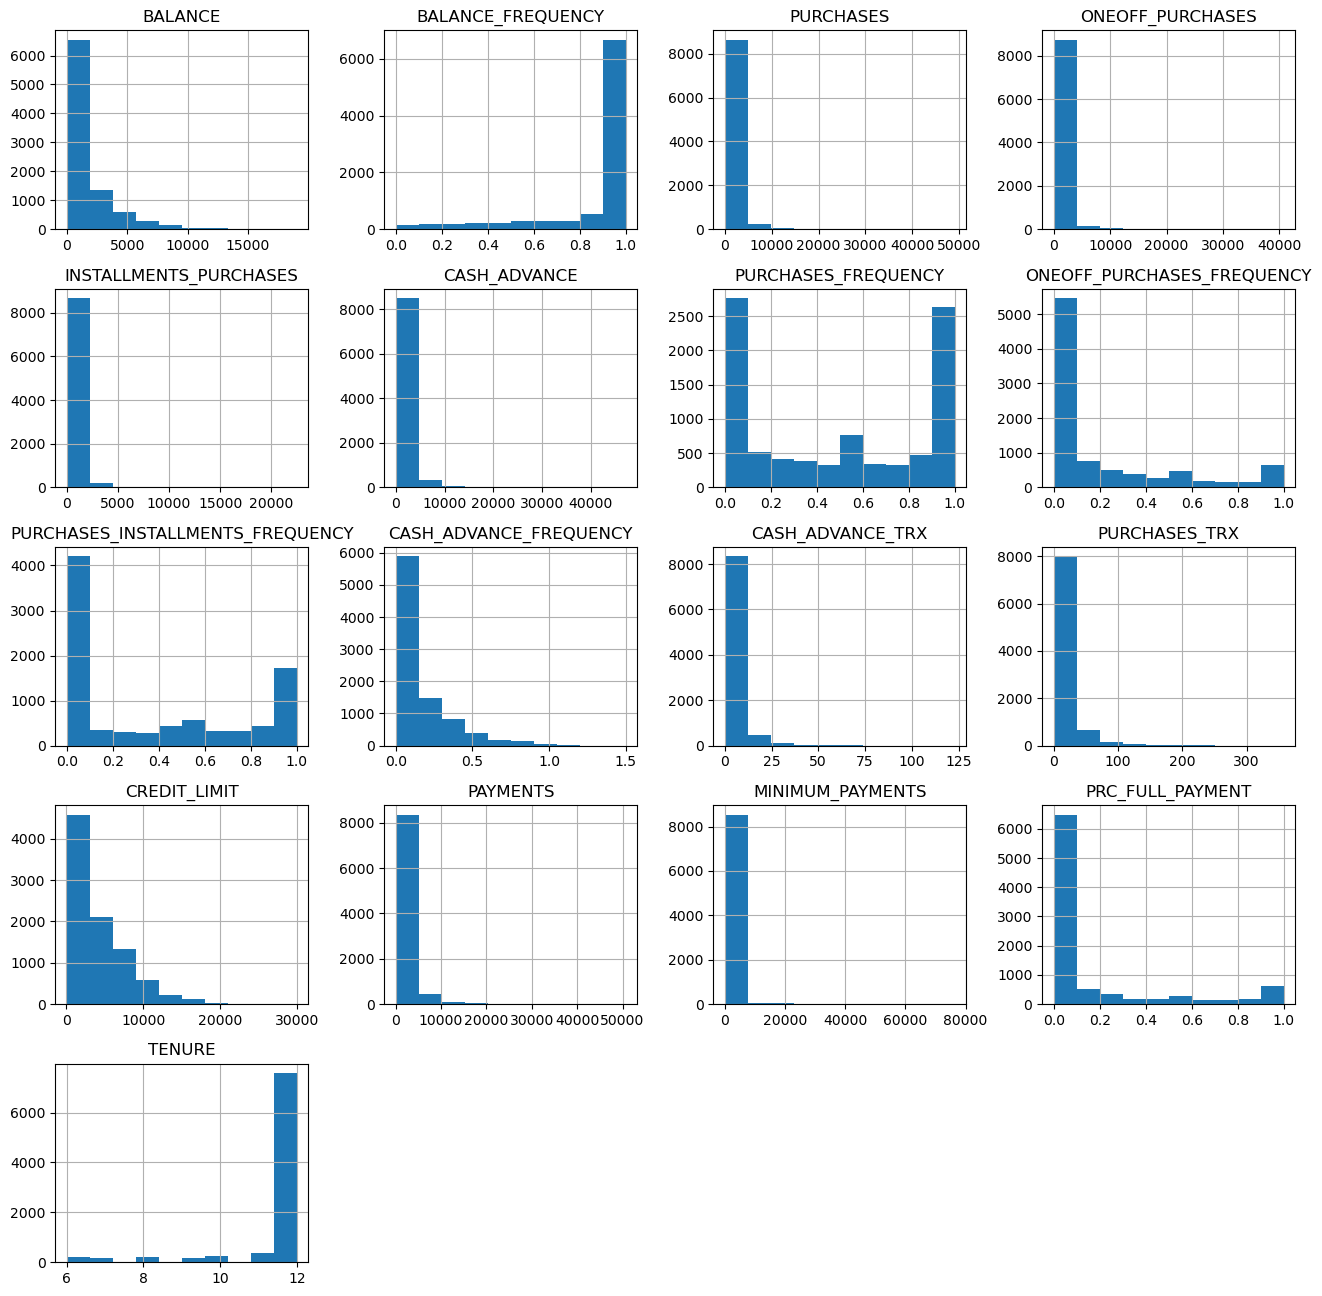

In [17]:
dfReduced = df.drop(columns=["CUST_ID"])
dfReduced.hist(figsize=(16,16),xlabelsize=10)

In [6]:
dfReduced.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [32]:
dfReduced.isnull().values.any()

True

In [36]:
# Lets fill nan values with means
for column in dfReduced.columns:
    mean = dfReduced[column].mean()
    dfReduced[column] = dfReduced[column].fillna(value=mean)
dfReduced.isnull().values.any()

False

In [37]:
correlation_matrix = dfReduced.corr()
correlation_matrix.style.background_gradient(cmap='coolwarm')

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531267,0.322802,0.394282,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095795,0.065008,0.114249,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356959,0.603264,0.093515,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319721,0.567292,0.048597,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256496,0.384084,0.131687,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303983,0.453238,0.139223,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119778,0.103464,0.002976,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295030,0.243537,-0.029963,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060752,0.085551,0.029590,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.097898,-0.249773,-0.133372


# Zaměření clusteringu
V tomto datasetu mě nejvíce zajímá kdo je v jaké sociální vrstvě a zda-li se dá dobře podle údajů kreditních karet tato vlastnost predikovat.  
Tudíž mě napadlo, že se kouknu na **Balance** a **Purchases** a vyberu features, které nejvíce ovlivňuje tyto 2 features  
Balance -> Balance_frequency, Cash_advance, Cash_advance_frequency, cash_advance_trx, credit_limit, payments, minimum_payments, prc_full_payment  
Purchases -> Oneoff_purchases, installments_purchases, purchases_frequency, oneoff_purchases_frequency, purchases_installments_frequency, purchases_trx, credit_limit, payments  
  
Zkusím vybrat features: ["BALANCE","CASH_ADVANCE", "BALANCE_FREQUENCY", "PURCHASES_FREQUENCY", "CASH_ADVANCE_FREQUENCY", "CREDIT_LIMIT", "PAYMENTS", "PURCHASES"]

In [38]:
features = ["BALANCE","CASH_ADVANCE", "BALANCE_FREQUENCY", "PURCHASES_FREQUENCY", "CASH_ADVANCE_FREQUENCY", "CREDIT_LIMIT", "PAYMENTS", "PURCHASES"]
dfFocusFeatures = dfReduced[features] # Df thats gonna have only important features for our clustering

array([[<Axes: title={'center': 'BALANCE'}>,
        <Axes: title={'center': 'CASH_ADVANCE'}>,
        <Axes: title={'center': 'BALANCE_FREQUENCY'}>],
       [<Axes: title={'center': 'PURCHASES_FREQUENCY'}>,
        <Axes: title={'center': 'CASH_ADVANCE_FREQUENCY'}>,
        <Axes: title={'center': 'CREDIT_LIMIT'}>],
       [<Axes: title={'center': 'PAYMENTS'}>,
        <Axes: title={'center': 'PURCHASES'}>, <Axes: >]], dtype=object)

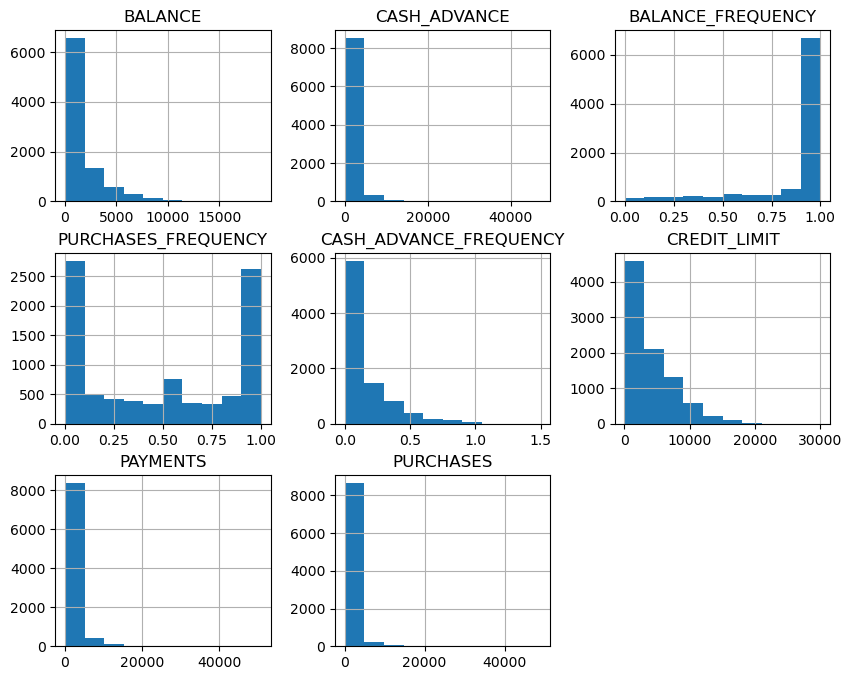

In [39]:
dfFocusFeatures.hist(figsize=(10,8),xlabelsize=10)

# Preprocessing - Scaling
Když se koukneme na distribuce našich vybraných numerical features, tak všechny až na PAYMENTS jsou tail-like distribuce. Normálně bych aplikoval **standardizaci** na gaussian distribuce a **power transform** na tail-like distribuce.
Zkusím však zvolit nový approach a použiju **Robust scaler**, který je především dobrý na outliers. A pro PURCHASES_FREQUENCY použiju **Standard scaler**.  
# Preprocessing - Encoding
Jelikož nemáme žádné klasifikační features, tak není třeba provést encoding. Pokud by dataset klasifikační features obsahoval, pak by se využilo s největší pravděpodobností ordinal nebo one hot encodingu.

In [49]:

robustFeatures = ["BALANCE","CASH_ADVANCE", "BALANCE_FREQUENCY", "CASH_ADVANCE_FREQUENCY", "CREDIT_LIMIT", "PAYMENTS", "PURCHASES"]
standardFeautures = ["PURCHASES_FREQUENCY"]
robustScaler = sklearn.preprocessing.RobustScaler()
standardScaler = sklearn.preprocessing.StandardScaler()
dfScaled = pd.DataFrame()
dfScaled[robustFeatures] = robustScaler.fit_transform(dfFocusFeatures[robustFeatures])
dfScaled[standardFeautures] = standardScaler.fit_transform(dfFocusFeatures[standardFeautures])

In [50]:
dfScaled

,BALANCE,CASH_ADVANCE,BALANCE_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS,PURCHASES,PURCHASES_FREQUENCY
0,-0.432267,0.000000,-1.636364,0.000000,-0.408163,-0.431595,-0.248371,-0.806490
1,1.209374,5.784542,-0.818182,1.125001,0.816327,2.138626,-0.337489,-1.221758
2,0.842099,0.000000,0.000000,0.000000,0.918367,-0.154715,0.384766,1.269843
3,0.411913,0.184759,-3.272727,0.374999,0.918367,-0.564547,1.062798,-1.014125
4,-0.028907,0.000000,0.000000,0.000000,-0.367347,-0.117644,-0.322542,-1.014125
...,...,...,...,...,...,...,...,...
8945,-0.438709,0.000000,0.000000,0.000000,-0.408163,-0.350037,-0.065540,1.269843
8946,-0.443544,0.000000,0.000000,0.000000,-0.408163,-0.382803,-0.057245,1.269843
8947,-0.441355,0.000000,-1.500005,0.000000,-0.408163,-0.511003,-0.202598,0.854576
8948,-0.446517,0.032823,-1.500005,0.750002,-0.510204,-0.529925,-0.337489,-1.221758


array([[<Axes: title={'center': 'BALANCE'}>,
        <Axes: title={'center': 'CASH_ADVANCE'}>,
        <Axes: title={'center': 'BALANCE_FREQUENCY'}>],
       [<Axes: title={'center': 'CASH_ADVANCE_FREQUENCY'}>,
        <Axes: title={'center': 'CREDIT_LIMIT'}>,
        <Axes: title={'center': 'PAYMENTS'}>],
       [<Axes: title={'center': 'PURCHASES'}>,
        <Axes: title={'center': 'PURCHASES_FREQUENCY'}>, <Axes: >]],
      dtype=object)

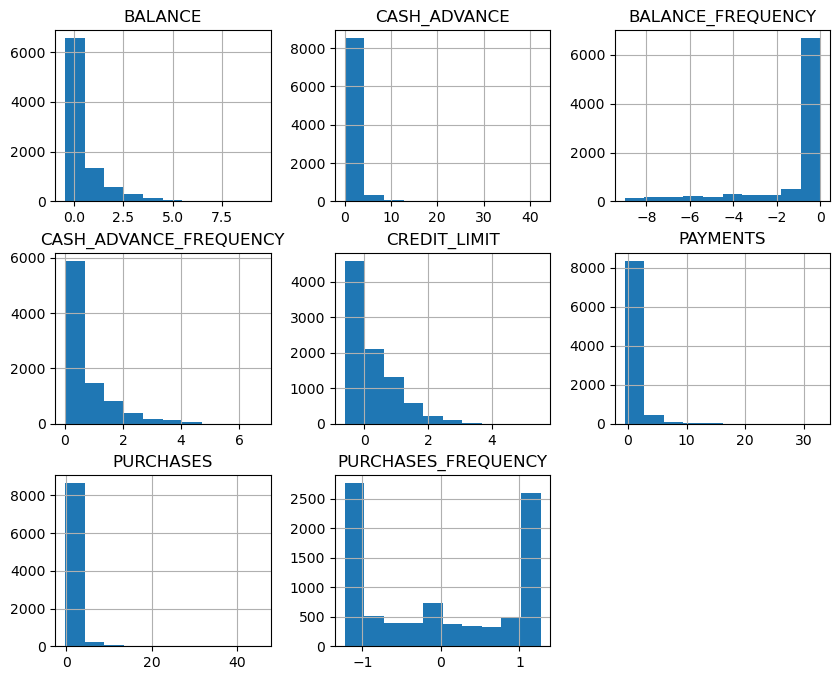

In [42]:
dfScaled.hist(figsize=(10,8),xlabelsize=10)

# Clustering
Nyní bych chtěl provést clustering metody na předzpracovaných datech. Chtěl bych použít **KMeans** jakožto takový standardní all around algoritmus a **DBSCAN** jakožto více robustní a komplexnější algoritmus. 

In [43]:
import sklearn.metrics


clustering_scores = []
for k in range(2,16):
    kmeans = sklearn.cluster.KMeans(n_clusters=k, random_state=13).fit(dfScaled)
    clustering_scores.append({
        'k': k,
        'sse': kmeans.inertia_,
        'silhouette': sklearn.metrics.silhouette_score(dfScaled, kmeans.labels_)
    })
dfClusteringScores = pd.DataFrame.from_dict(clustering_scores, orient='columns')
dfClusteringScores

,k,sse,silhouette
0,2,135891.258829,0.387217
1,3,105182.518757,0.431120
2,4,84648.265771,0.438126
3,5,74722.266723,0.273140
4,6,65775.146761,0.272298
5,7,54481.496321,0.288875
6,8,51113.894665,0.281309
7,9,47508.908542,0.282602
8,10,45826.590552,0.255666
9,11,43552.163599,0.257275


<Axes: xlabel='k', ylabel='sse'>

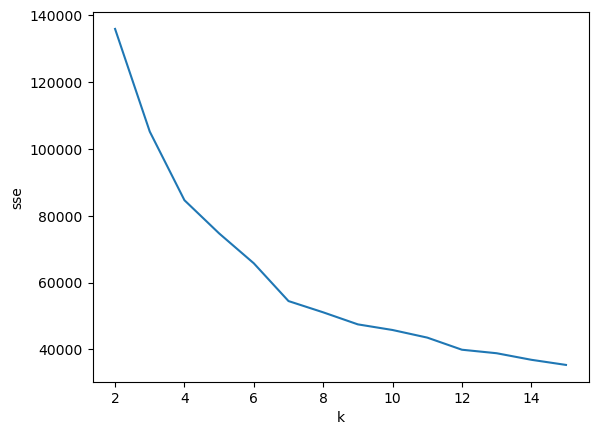

In [45]:
sns.lineplot(data=dfClusteringScores, x='k', y='sse')

<Axes: xlabel='k', ylabel='silhouette'>

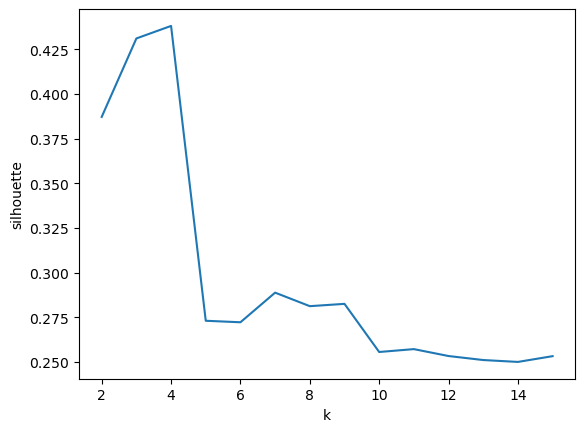

In [46]:
sns.lineplot(data=dfClusteringScores, x='k', y='silhouette')

# Výběr počtu clusterů
Nejlepší **silhouette** skóre je pro **k = 4** a zároveň v **k = 4** můžeme u **sse** pozorova 'loket' pro elbow metodu. Vhodný loket by byl i v k = 7, kde i dojde ke zlepšení silhouette.  
Pokud se však zamyslím nad tím, jak chci data klasifikovat a které třídy bych chtěl najít (Nižší vrstva, střední vrstva, vyšší vrstva), tak bych radši preferoval **4** clustery než 7.  

In [63]:
kmeans = sklearn.cluster.KMeans(n_clusters=4, random_state=13).fit(dfScaled)

In [64]:
clusters = kmeans.predict(dfScaled)
dfReduced['cluster'] = clusters
dfReduced

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


In [65]:
dfFocusFeatures['cluster'] = clusters
dfFocusFeatures

C:\Users\msi pc\AppData\Local\Temp\ipykernel_3248\2459476616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFocusFeatures['cluster'] = clusters


,BALANCE,CASH_ADVANCE,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS,PURCHASES,cluster
0,40.900749,0.000000,0.818182,0.166667,0.000000,1000.0,201.802084,95.40,0
1,3202.467416,6442.945483,0.909091,0.000000,0.250000,7000.0,4103.032597,0.00,2
2,2495.148862,0.000000,1.000000,1.000000,0.000000,7500.0,622.066742,773.17,0
3,1666.670542,205.788017,0.636364,0.083333,0.083333,7500.0,0.000000,1499.00,1
4,817.714335,0.000000,1.000000,0.083333,0.000000,1200.0,678.334763,16.00,0
...,...,...,...,...,...,...,...,...,...
8945,28.493517,0.000000,1.000000,1.000000,0.000000,1000.0,325.594462,291.12,0
8946,19.183215,0.000000,1.000000,1.000000,0.000000,1000.0,275.861322,300.00,0
8947,23.398673,0.000000,0.833333,0.833333,0.000000,1000.0,81.270775,144.40,0
8948,13.457564,36.558778,0.833333,0.000000,0.166667,500.0,52.549959,0.00,0


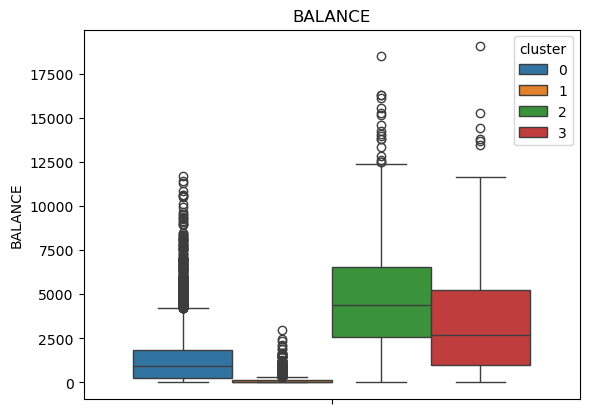

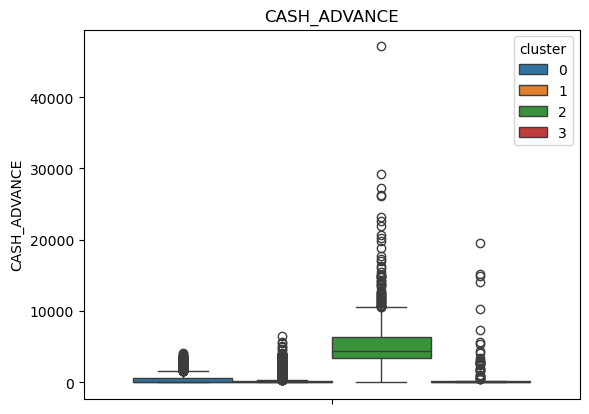

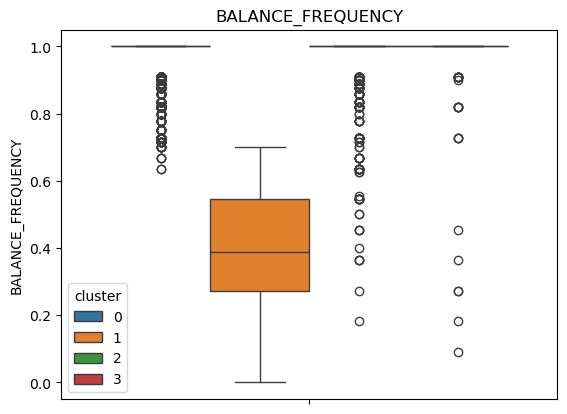

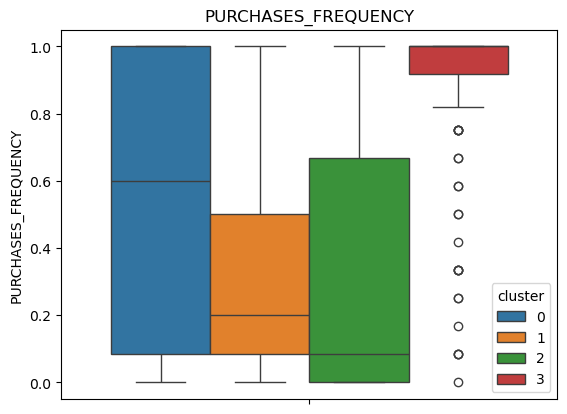

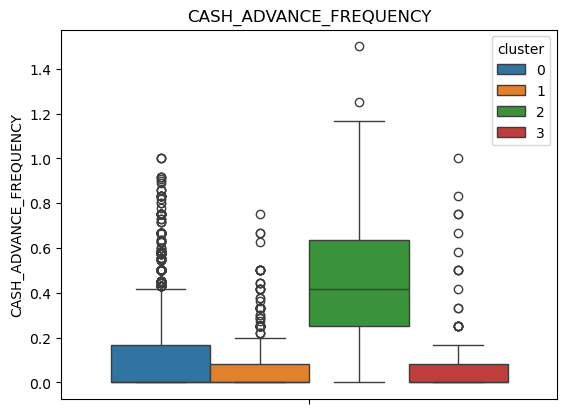

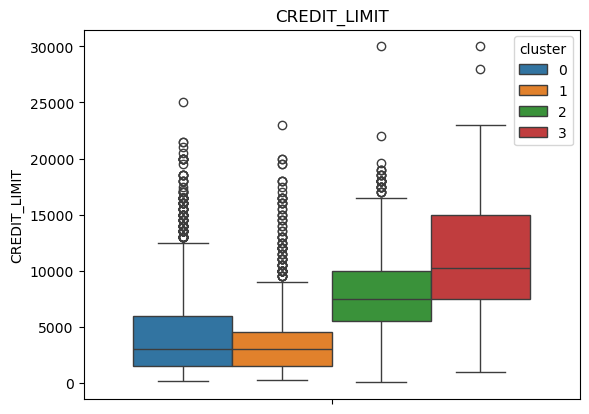

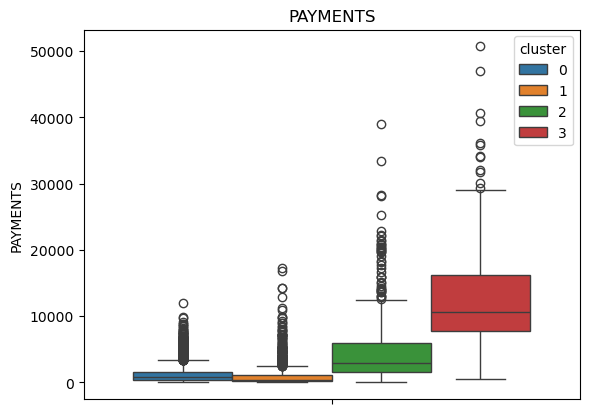

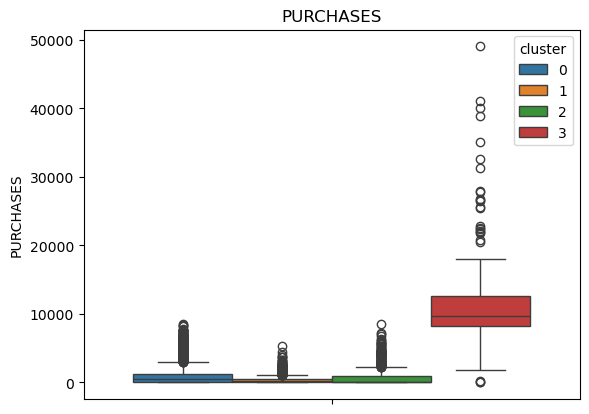

In [67]:
for column in dfFocusFeatures.columns.values[:-1]: # Skip last column 'cluster'
    sns.boxplot(data=dfFocusFeatures, y=column, hue='cluster', palette='tab10')
    plt.title(column)
    plt.show()